# Pengenalan

**Overview**

If you’ve ever had a comment taken down on Reddit and wondered “why?”, you’re not alone. Each subreddit has its own set of guidelines, and trying to understand individual subreddit moderation can feel like chaos.

In this competition, you’ll bring some ‘comment sense’ to the table and work with real data to build models that predict which rule (if any) a comment may have broken.

**Description**

Your task is to create a binary classifier that predicts whether a Reddit comment broke a specific rule. The dataset comes from a large collection of moderated comments, with a range of subreddit norms, tones, and community expectations.

The rules you’ll be working with are based on actual subreddit guidelines, but the dataset itself is drawn from older, unlabeled content. A small labeled dev set has been created to help you get started.

This is a chance to explore how machine learning can support real-world content moderation, particularly in communities with unique rules and norms.

**Background**

Inspired by the work of our colleagues Deepak Kumar, Yousef AbuHashem, and Zakir Durumeric where large language models were deployed to try to guess the reasons that moderators used to remove comments. This work builds upon the work of Eshwar Chandrasekharan and Eric Gilbert which collected a set of millions of moderated comments.

This several-year-old dataset is unlabeled. It is accompanied by a list of hypothetical rules—derived from real rules on a variety of subreddits—to help identify potential comment violations.

**Rules Classification**

Participants have access to a small subset of the data, which can be used as a dev resource. This information is suitable for use as training data or for few-shot examples. The remainder of the labels will be used, in a 30%:70% to form the public and private test sets.

**Evaluation**

***Scoring*** :
Submissions are evaluated on column-averaged AUC.

***Submission File*** :
For each row_id in the test set, you must predict the probability that a comment violates a given rule. The file should contain a header and have the following format:

# Data Understanding

## Data Train

### load data

In [1]:
import pandas as pd

data_train = pd.read_csv('train.csv')
data_train

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1
3,3,she will come your home open her legs with an...,"No Advertising: Spam, referral links, unsolici...",sex,Selling Tyrande codes for 3€ to paypal. PM. \n...,tight pussy watch for your cock get her at thi...,NSFW(obviously) http://spankbang.com/iy3u/vide...,Good News ::Download WhatsApp 2.16.230 APK for...,1
4,4,code free tyrande --->>> [Imgur](http://i.imgu...,"No Advertising: Spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.Well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,We're streaming Pokemon Veitnamese Crystal RIG...,1
...,...,...,...,...,...,...,...,...,...
2024,2024,Please edit your post so it is readable. These...,No legal advice: Do not offer or request legal...,relationships,"I'm not ok with this in anyway, and think you ...",See a lawyer under the guise that you want thi...,"This is just untrue. OP is 13, not an adult -...",Why should I care about all the bicyclists I i...,1
2025,2025,"Yes, and in a right to work state they can eve...",No legal advice: Do not offer or request legal...,legaladvice,Move as much of your assets as you can offshor...,We have great consumer protection laws. There'...,"LPT piratebay, transmission, vpn. Get the musi...","It's not so much that I killed them, it's that...",0
2026,2026,**HD** Streams: |ENG **HD**[ Watch here..PC & ...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,stitopdisca1987.tumblr.com - sex Take girl for...,this girl get sex going to to old http://mrk....,NO ADS | NO ADS | NO ADS\n\nWe show all SOCCER...,[So great! Thanks for sharing.](http://www.che...,1
2027,2027,No. Not when doing so obviously presents a saf...,No legal advice: Do not offer or request legal...,politics,SHE ISNT A BIRTHING CHAMBER BUT EQUALLY THE BA...,"Jail? What are you, ten years old? If they pro...",Who cares about that when I can keep raping in...,send me a private message; I may be able to he...,1


### info data

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              2029 non-null   int64 
 1   body                2029 non-null   object
 2   rule                2029 non-null   object
 3   subreddit           2029 non-null   object
 4   positive_example_1  2029 non-null   object
 5   positive_example_2  2029 non-null   object
 6   negative_example_1  2029 non-null   object
 7   negative_example_2  2029 non-null   object
 8   rule_violation      2029 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 142.8+ KB


### type data

In [3]:
data_train.select_dtypes(include='object').columns

Index(['body', 'rule', 'subreddit', 'positive_example_1', 'positive_example_2',
       'negative_example_1', 'negative_example_2'],
      dtype='object')

In [5]:
len(data_train.select_dtypes(include='object').columns)

7

In [6]:
data_train.select_dtypes(include='number').columns

Index(['row_id', 'rule_violation'], dtype='object')

In [7]:
len(data_train.select_dtypes(include='number').columns)

2

### deskripsi column

| **Kolom**            | **Deskripsi**                                                 |
| -------------------- | ------------------------------------------------------------- |
| `row_id`             | ID unik untuk setiap baris dalam dataset.                     |
| `body`               | Isi komentar atau postingan Reddit yang dianalisis.           |
| `rule`               | Aturan subreddit yang dijadikan dasar penilaian.              |
| `subreddit`          | Nama subreddit tempat konten tersebut berasal.                |
| `positive_example_1` | Contoh pertama teks yang **melanggar** aturan (`rule`).       |
| `positive_example_2` | Contoh kedua teks yang **melanggar** aturan (`rule`).         |
| `negative_example_1` | Contoh pertama teks yang **tidak melanggar** aturan (`rule`). |
| `negative_example_2` | Contoh kedua teks yang **tidak melanggar** aturan (`rule`).   |
| `rule_violation`     | Label apakah `body` melanggar aturan (`1`) atau tidak (`0`).  |


### data agg

In [8]:
data_train.describe()

,row_id,rule_violation
count,2029.000000,2029.000000
mean,1014.000000,0.508132
std,585.866168,0.500057
min,0.000000,0.000000
25%,507.000000,0.000000
50%,1014.000000,1.000000
75%,1521.000000,1.000000
max,2028.000000,1.000000


### missing value

In [22]:
data_train.isna().sum()


,0
row_id,0
body,0
rule,0
subreddit,0
positive_example_1,0
positive_example_2,0
negative_example_1,0
negative_example_2,0
rule_violation,0


### data duplicate

In [12]:
data_train.duplicated().sum()

np.int64(0)

## Data Test

In [13]:
data_test = pd.read_csv('test.csv')
data_test

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2
0,2029,NEW RAP GROUP 17. CHECK US OUT https://soundcl...,"No Advertising: Spam, referral links, unsolici...",hiphopheads,"Hey, guys, just wanted to drop in and invite y...",Cum Swallowing Hottie Katrina Kaif Cartoon Xvi...,SD Stream Eng - [Chelsea TV USA](http://soccer...,HD Streams: |[ENG HD Stoke vs Manchester Unite...
1,2030,Make your life comfortable. Get up to 15% Disc...,No legal advice: Do not offer or request legal...,AskReddit,Get a lawyer and get the security camera foota...,That isn't drastic. You tried reaching out to ...,So what are you going to do with the insurance...,It's just for Austria & Germany. If you still ...
2,2031,Kickin' ass and selling underwear!\nJust made ...,"No Advertising: Spam, referral links, unsolici...",gonewild,Good story my friend. Check out my blog at ht...,If you know what exactly you need then you don...,CENTIPEDES\n\nSOME BASED PATRIOTS HAVE CREATED...,[So great! Thanks for sharing.](http://www.che...
3,2032,watch hooters best therein http://clickan...,"No Advertising: Spam, referral links, unsolici...",personalfinance,"Earn 50,000 bonus points with Chase Sapphire P...","Cool, front page! I made this print along with...",[Full HD Movie Online Free](http://www.flickma...,* Karambit Black Pearl\n* 0.02137822 Float (un...
4,2033,bitches for free at this point show all h...,"No Advertising: Spam, referral links, unsolici...",Showerthoughts,code free tyrande --->>> [Imgur](http://i.imgu...,My trade link\nhttps://steamcommunity.com/trad...,**HD** [ mio Stadium 102 HD](http://www.genti....,Infographics is an incredible method for showi...
5,2034,Top 10 Pentakills in August https://youtu.be/Z...,"No Advertising: Spam, referral links, unsolici...",leagueoflegends,code free tyrande --->>> [Imgur](http://i.imgu...,see tits sweet at this point http://sh.or...,its my asreddit https://www.youtube.com/watch?...,click here for more videos[Russian mafia messe...
6,2035,WIN A SAMSUNG SMARTWATCH!\n\nhttp://www.innomd...,"No Advertising: Spam, referral links, unsolici...",AskReddit,"[ENJOY 50,000 BONUS POINTS after $4,000 spent ...",We have high quality Canadian Polymer banknote...,i was on the same ios and try this jailbreak m...,We're streaming Pokemon Veitnamese Crystal RIG...
7,2036,[This mixtape is lit FAM!](https://beholdthear...,"No Advertising: Spam, referral links, unsolici...",BlackPeopleTwitter,watch good one hooters there http://https://x5...,bad pussies waiting for you herein http://gour...,[Full HD Movie Online Free](http://www.flickma...,* Computers :http://livematchstreamz.blogspot....
8,2037,must be watch movie https://sites.google.com/s...,"No Advertising: Spam, referral links, unsolici...",movies,see there hooters sweet http://url.t.aylo...,"Sign up with my link and get $1,000 of free pr...",The fact that there are pro and cons to everyt...,Oh that's interesting. You should check out my...
9,2038,Free paypal cards here!! https://www.pointspri...,"No Advertising: Spam, referral links, unsolici...",pics,she will come your home open her legs with an...,Old and young your girl-next-door make sex wi...,"i think the conjuring 2 is not bad movie ,The...","wow, she's so beautyful\n>[Sakura Vietnam](htt..."


### info data

In [14]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              10 non-null     int64 
 1   body                10 non-null     object
 2   rule                10 non-null     object
 3   subreddit           10 non-null     object
 4   positive_example_1  10 non-null     object
 5   positive_example_2  10 non-null     object
 6   negative_example_1  10 non-null     object
 7   negative_example_2  10 non-null     object
dtypes: int64(1), object(7)
memory usage: 772.0+ bytes


### type data

In [16]:
data_test.select_dtypes(include='object').columns

Index(['body', 'rule', 'subreddit', 'positive_example_1', 'positive_example_2',
       'negative_example_1', 'negative_example_2'],
      dtype='object')

In [17]:
len(data_test.select_dtypes(include='object').columns)

7

In [18]:
data_test.select_dtypes(include='number').columns

Index(['row_id'], dtype='object')

In [19]:
len(data_test.select_dtypes(include='number').columns)

1

### deskripsi column

| **Kolom**            | **Deskripsi**                                                 |
| -------------------- | ------------------------------------------------------------- |
| `row_id`             | ID unik untuk setiap baris dalam dataset.                     |
| `body`               | Isi komentar atau postingan Reddit yang dianalisis.           |
| `rule`               | Aturan subreddit yang dijadikan dasar penilaian.              |
| `subreddit`          | Nama subreddit tempat konten tersebut berasal.                |
| `positive_example_1` | Contoh pertama teks yang **melanggar** aturan (`rule`).       |
| `positive_example_2` | Contoh kedua teks yang **melanggar** aturan (`rule`).         |
| `negative_example_1` | Contoh pertama teks yang **tidak melanggar** aturan (`rule`). |
| `negative_example_2` | Contoh kedua teks yang **tidak melanggar** aturan (`rule`).   |


### missing value

In [21]:
data_test.isna().sum()

,0
row_id,0
body,0
rule,0
subreddit,0
positive_example_1,0
positive_example_2,0
negative_example_1,0
negative_example_2,0


### data duplicate

In [23]:
data_test.duplicated().sum()

np.int64(0)

# EDA (Explorasi Data)

## Encoding

### cek jumlah group dalam column

In [25]:
data_train.nunique()

,0
row_id,2029
body,1869
rule,2
subreddit,100
positive_example_1,458
positive_example_2,461
negative_example_1,489
negative_example_2,493
rule_violation,2


**OneHot encode** = rule

**binary encode** = body,subreddit,positive_example_1, positive_example_2, negative_example_1, negative_example_2

### install library binary encode

In [37]:
!pip install category_encoders

## type masalah

In [51]:
import pandas as pd

data_train = pd.read_csv('train.csv')
data = data_train['rule_violation'].value_counts().reset_index(name='jumlah_kelas')
data['percentage'] = round(data['jumlah_kelas'] / len(data_train) * 100,2)
data

,rule_violation,jumlah_kelas,percentage
0,1,1031,50.81
1,0,998,49.19


type masalahnya adalah binary classification dikarenakan label memiliki 2 kelas misal >2 maka termasuk multiple classification

karena Distribusinya adalah 1031 : 50.81% vs 998 : 49.19%, selisihnya hanya 33 data dari total 2029 data. maka data bisa dibilang balance

# Machine Learning

disini saya akan menguji 6 model  sekaligus :

**Original**
- LogisticRegression
- DecisionTreeClassifier
- KNeighborsClassifier

**Baging**
- RandomForestClassifier

**Boosting**
- LGBMClassifier
- XGBClassifier

## modeling for search best model

In [61]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

data_ml = pd.read_csv('train.csv')

# Pisahkan fitur dan target
X = data_ml.drop(['row_id', 'rule_violation'], axis=1)
y = data_ml['rule_violation']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

# Split lagi TrainVal menjadi Training (60%) dan Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=2020
) # 0.25 itu didapat dari 20% dibagi 80% (data training)

# pilih fitur yang akan di encode
onehot_encode = [ 'rule']
binary_encode = ['subreddit']

# Buat pipeline untuk masing-masing transformasi:  encoding
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
binary_transformer = Pipeline(steps=[
    ('onehot', ce.BinaryEncoder())
])

# Fungsi untuk mengubah data teks dari dataframe kolom tunggal (2D) menjadi array 1D,
# karena TfidfVectorizer membutuhkan input berupa array 1 dimensi (list teks).
def to_1d(X):
    return X.squeeze()

# Membuat pipeline untuk transformasi teks:
# 1) Extract teks dalam format 1D menggunakan FunctionTransformer dan fungsi to_1d.
# 2) Mengubah teks menjadi representasi numerik TF-IDF dengan maksimal 1000 fitur.
# Pipeline ini memudahkan penerapan TF-IDF pada setiap kolom teks secara terpisah.
def make_tfidf_pipeline():
    return Pipeline([
        ('extract', FunctionTransformer(to_1d, validate=False)),
        ('tfidf', TfidfVectorizer(max_features=1000))
    ])

# Daftar pipeline transformasi untuk setiap kolom teks yang berbeda.
# Setiap kolom akan diproses dengan pipeline TF-IDF yang sama secara independen.
text_transformers = [
    ('tfidf_body', make_tfidf_pipeline(), 'body'),
    ('tfidf_pos1', make_tfidf_pipeline(), 'positive_example_1'),
    ('tfidf_pos2', make_tfidf_pipeline(), 'positive_example_2'),
    ('tfidf_neg1', make_tfidf_pipeline(), 'negative_example_1'),
    ('tfidf_neg2', make_tfidf_pipeline(), 'negative_example_2'),
]


# Gabungkan semua transformasi ke dalam ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, onehot_encode),
    ('binary', binary_transformer, binary_encode),
    *text_transformers
], remainder='passthrough')

## kandidat model
models = {
    'Logistic Regression': LogisticRegression(), # random_state tidak perlu untuk 'liblinear'
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),   # tidak perlu random_state
    'LGBM': LGBMClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42)
}

model_results = []

for name, model in models.items():
    # pipeline keseluruhan/final
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'F1': f1
    })


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

[LightGBM] [Info] Number of positive: 619, number of negative: 598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21263
[LightGBM] [Info] Number of data points in the train set: 1217, number of used features: 1157
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508628 -> initscore=0.034515
[LightGBM] [Info] Start training from score 0.034515


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Recall,Precision,F1
3,LGBM,0.729064,0.762136,0.720183,0.740566
0,Logistic Regression,0.704433,0.742718,0.695455,0.718310
4,Random Forest,0.689655,0.776699,0.666667,0.717489
5,xgboost,0.689655,0.713592,0.686916,0.700000
1,Decision Tree,0.655172,0.679612,0.654206,0.666667
2,KNN,0.598522,0.621359,0.600939,0.610979


## Cross validation

In [77]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

# Load data
data_ml = pd.read_csv('train.csv')

# Pisahkan fitur dan target
X = data_ml.drop(['row_id', 'rule_violation'], axis=1)
y = data_ml['rule_violation']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=2020
)

# pilih fitur yang akan di encode
onehot_encode = [ 'rule']
binary_encode = ['subreddit']

# Buat pipeline untuk masing-masing transformasi:  encoding
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
binary_transformer = Pipeline(steps=[
    ('onehot', ce.BinaryEncoder())
])

# Fungsi untuk mengubah data teks dari dataframe kolom tunggal (2D) menjadi array 1D,
# karena TfidfVectorizer membutuhkan input berupa array 1 dimensi (list teks).
def to_1d(X):
    return X.squeeze()

# Membuat pipeline untuk transformasi teks:
# 1) Extract teks dalam format 1D menggunakan FunctionTransformer dan fungsi to_1d.
# 2) Mengubah teks menjadi representasi numerik TF-IDF dengan maksimal 1000 fitur.
# Pipeline ini memudahkan penerapan TF-IDF pada setiap kolom teks secara terpisah.
def make_tfidf_pipeline():
    return Pipeline([
        ('extract', FunctionTransformer(to_1d, validate=False)),
        ('tfidf', TfidfVectorizer(max_features=1000))
    ])

# Daftar pipeline transformasi untuk setiap kolom teks yang berbeda.
# Setiap kolom akan diproses dengan pipeline TF-IDF yang sama secara independen.
text_transformers = [
    ('tfidf_body', make_tfidf_pipeline(), 'body'),
    ('tfidf_pos1', make_tfidf_pipeline(), 'positive_example_1'),
    ('tfidf_pos2', make_tfidf_pipeline(), 'positive_example_2'),
    ('tfidf_neg1', make_tfidf_pipeline(), 'negative_example_1'),
    ('tfidf_neg2', make_tfidf_pipeline(), 'negative_example_2'),
]


# Gabungkan semua transformasi ke dalam ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, onehot_encode),
    ('binary', binary_transformer, binary_encode),
    *text_transformers
], remainder='passthrough')


## kandidat model
models = {
    'Logistic Regression': LogisticRegression(), # random_state tidak perlu untuk 'liblinear'
    'LGBM': LGBMClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_results = []

for name, model in models.items():
    # pipeline keseluruhan/final
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    f1_scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

    model_results.append({
        'Model': name,
        'Fold-1': f1_scores[0],
        'Fold-2': f1_scores[1],
        'Fold-3': f1_scores[2],
        'Fold-4': f1_scores[3],
        'Fold-5': f1_scores[4],
        'Mean F1': f1_scores.mean(),
        'Std F1': f1_scores.std()

    })


result_df = pd.DataFrame(model_results).T
result_df


,0,1,2
Model,Logistic Regression,LGBM,Random Forest
Fold-1,0.699029,0.668831,0.707317
Fold-2,0.646259,0.659933,0.662379
Fold-3,0.704319,0.629758,0.666667
Fold-4,0.691781,0.70903,0.684039
Fold-5,0.668966,0.661972,0.700337
Mean F1,0.682071,0.665905,0.684148
Std F1,0.021592,0.025401,0.017767


## hyperparameter tuning

### RandomforestClassifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_params = {
    'classifier__n_estimators': [100, 300, 500],        # jumlah pohon
    'classifier__max_depth': [None, 10, 20, 30],       # kedalaman maksimum pohon
    'classifier__min_samples_split': [2, 5, 10],       # min sampel untuk split node
    'classifier__min_samples_leaf': [1, 2, 4],         # min sampel di leaf node
    'classifier__max_features': ['auto', 'sqrt', 'log2'],  # jumlah fitur yang dipilih tiap split
    'classifier__bootstrap': [True, False]              # apakah pakai bootstrap sampling
}

rf_grid = GridSearchCV(
    estimator=pipeline,
    param_grid=rf_params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("Best parameters (Random Forest):", rf_grid.best_params_)
print("Best F1 Score:", rf_grid.best_score_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y

Best parameters (Random Forest): {'classifier__bootstrap': False, 'classifier__max_depth': 30, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best F1 Score: 0.7399818351082048


### Logistic regression

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


lr_params = {
    'classifier__penalty': ['l1', 'l2'],              # Jenis regularisasi yang digunakan ('l1' untuk seleksi fitur, 'l2' untuk shrinkage)
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Besarnya regularisasi (semakin kecil nilainya, semakin kuat regularisasinya)
    'classifier__max_iter': [100, 200, 300, 500],     # Jumlah maksimum iterasi agar model konvergen saat training
    'classifier__class_weight': [None, 'balanced'],  # Penyesuaian bobot kelas (berguna jika datanya imbalanced)
    'classifier__fit_intercept': [True, False],       # Apakah model menambahkan intercept (bias) atau tidak
    'classifier__intercept_scaling': [1, 2, 5],       # Hanya relevan jika fit_intercept=True dan solver='liblinear'
    'classifier__dual': [False],                      # Harus False jika jumlah data > jumlah fitur (umumnya selalu False)
    'classifier__solver': ['liblinear'],              # Algoritma optimasi; 'liblinear' mendukung penalty 'l1' dan 'l2'
}

lr_grid = GridSearchCV(
    estimator=pipeline,
    param_grid=lr_params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

lr_grid.fit(X_train, y_train)
print("Best Params:", lr_grid.best_params_)
print("Best F1 Score:", lr_grid.best_score_)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Params: {'classifier__C': 1, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__fit_intercept': True, 'classifier__intercept_scaling': 5, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best F1 Score: 0.7072040757660452


# Final Model

## RandomForestClasifier



### Modeling

In [88]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

data_ml = pd.read_csv('train.csv')

# Pisahkan fitur dan target
X = data_ml.drop(['row_id', 'rule_violation'], axis=1)
y = data_ml['rule_violation']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=2020
)

# pilih fitur yang akan di encode
onehot_encode = [ 'rule']
binary_encode = ['subreddit']

# Buat pipeline untuk masing-masing transformasi:  encoding
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
binary_transformer = Pipeline(steps=[
    ('onehot', ce.BinaryEncoder())
])

# Fungsi untuk mengubah data teks dari dataframe kolom tunggal (2D) menjadi array 1D,
# karena TfidfVectorizer membutuhkan input berupa array 1 dimensi (list teks).
def to_1d(X):
    return X.squeeze()

# Membuat pipeline untuk transformasi teks:
# 1) Extract teks dalam format 1D menggunakan FunctionTransformer dan fungsi to_1d.
# 2) Mengubah teks menjadi representasi numerik TF-IDF dengan maksimal 1000 fitur.
# Pipeline ini memudahkan penerapan TF-IDF pada setiap kolom teks secara terpisah.
def make_tfidf_pipeline():
    return Pipeline([
        ('extract', FunctionTransformer(to_1d, validate=False)),
        ('tfidf', TfidfVectorizer(max_features=1000))
    ])

# Daftar pipeline transformasi untuk setiap kolom teks yang berbeda.
# Setiap kolom akan diproses dengan pipeline TF-IDF yang sama secara independen.
text_transformers = [
    ('tfidf_body', make_tfidf_pipeline(), 'body'),
    ('tfidf_pos1', make_tfidf_pipeline(), 'positive_example_1'),
    ('tfidf_pos2', make_tfidf_pipeline(), 'positive_example_2'),
    ('tfidf_neg1', make_tfidf_pipeline(), 'negative_example_1'),
    ('tfidf_neg2', make_tfidf_pipeline(), 'negative_example_2'),
]


# Gabungkan semua transformasi ke dalam ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, onehot_encode),
    ('binary', binary_transformer, binary_encode),
    *text_transformers
], remainder='passthrough')


# pipeline keseluruhan/final
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',  RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42))
])

# latih datanya
pipeline.fit(X_train, y_train)

#predict data yang sudah di latih
y_test_pred = pipeline.predict(X_test)

# Hitung metrik
acc = accuracy_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Buat DataFrame hasil evaluasi
test_eval_df = pd.DataFrame([{
    'Model': 'RandomForestClassifier test',
    'Accuracy': acc,
    'Recall': rec,
    'Precision': prec,
    'F1 Score': f1,

}])

test_eval_df

,Model,Accuracy,Recall,Precision,F1 Score
0,RandomForestClassifier test,0.712644,0.822006,0.679144,0.743777


### Confusion metrik

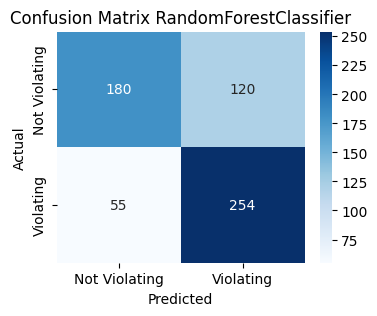

In [95]:
from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (Opsional) Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Violating', 'Violating'], yticklabels=['Not Violating', 'Violating'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RandomForestClassifier')
plt.show()

### Roc-Auc

In [90]:
from sklearn.metrics import roc_auc_score

y_test_prob = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_prob)
print(f"AUC Score: {auc:.4f}")

AUC Score: 0.7959


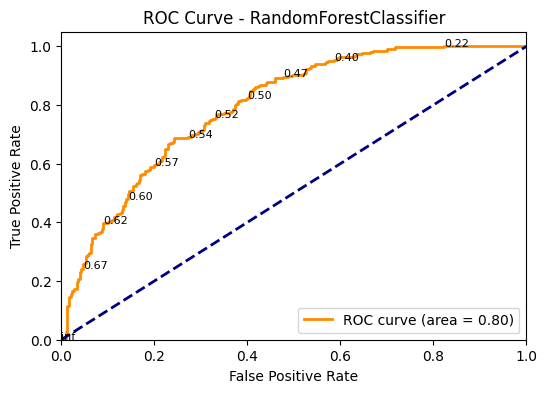

In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Tambahkan threshold pada beberapa titik
for i in range(0, len(thresholds), int(len(thresholds)/10)):
    plt.annotate(f'{thresholds[i]:.2f}', (fpr[i], tpr[i]), fontsize=8)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

## Logistic Regressionn

### Modeling

In [96]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

data_ml = pd.read_csv('train.csv')

# Pisahkan fitur dan target
X = data_ml.drop(['row_id', 'rule_violation'], axis=1)
y = data_ml['rule_violation']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=2020
)

# pilih fitur yang akan di encode
onehot_encode = [ 'rule']
binary_encode = ['subreddit']

# Buat pipeline untuk masing-masing transformasi:  encoding
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
binary_transformer = Pipeline(steps=[
    ('onehot', ce.BinaryEncoder())
])

# Fungsi untuk mengubah data teks dari dataframe kolom tunggal (2D) menjadi array 1D,
# karena TfidfVectorizer membutuhkan input berupa array 1 dimensi (list teks).
def to_1d(X):
    return X.squeeze()

# Membuat pipeline untuk transformasi teks:
# 1) Extract teks dalam format 1D menggunakan FunctionTransformer dan fungsi to_1d.
# 2) Mengubah teks menjadi representasi numerik TF-IDF dengan maksimal 1000 fitur.
# Pipeline ini memudahkan penerapan TF-IDF pada setiap kolom teks secara terpisah.
def make_tfidf_pipeline():
    return Pipeline([
        ('extract', FunctionTransformer(to_1d, validate=False)),
        ('tfidf', TfidfVectorizer(max_features=1000))
    ])

# Daftar pipeline transformasi untuk setiap kolom teks yang berbeda.
# Setiap kolom akan diproses dengan pipeline TF-IDF yang sama secara independen.
text_transformers = [
    ('tfidf_body', make_tfidf_pipeline(), 'body'),
    ('tfidf_pos1', make_tfidf_pipeline(), 'positive_example_1'),
    ('tfidf_pos2', make_tfidf_pipeline(), 'positive_example_2'),
    ('tfidf_neg1', make_tfidf_pipeline(), 'negative_example_1'),
    ('tfidf_neg2', make_tfidf_pipeline(), 'negative_example_2'),
]


# Gabungkan semua transformasi ke dalam ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, onehot_encode),
    ('binary', binary_transformer, binary_encode),
    *text_transformers
], remainder='passthrough')


# pipeline keseluruhan/final
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=5, max_iter=100, penalty='l1', solver='liblinear'))
])

# latih datanya
pipeline.fit(X_train, y_train)

#predict data yang sudah di latih
y_test_pred = pipeline.predict(X_test)

# Hitung metrik
acc = accuracy_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Buat DataFrame hasil evaluasi
test_eval_df = pd.DataFrame([{
    'Model': 'Logistic Regression test',
    'Accuracy': acc,
    'Recall': rec,
    'Precision': prec,
    'F1 Score': f1,

}])

test_eval_df

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression test,0.740558,0.783172,0.726727,0.753894


### Confusion Metrik

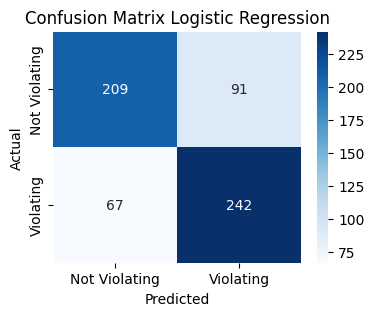

In [97]:
from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (Opsional) Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Violating', 'Violating'], yticklabels=['Not Violating', 'Violating'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

### ROC -AUC

In [99]:
from sklearn.metrics import roc_auc_score

y_test_prob = pipeline.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_prob)
print(f"AUC Score: {auc:.4f}")

AUC Score: 0.8159


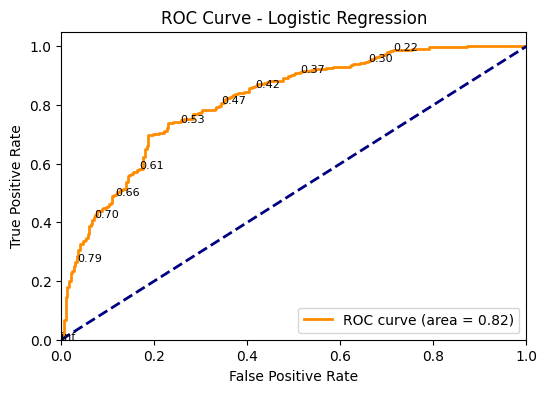

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Tambahkan threshold pada beberapa titik
for i in range(0, len(thresholds), int(len(thresholds)/10)):
    plt.annotate(f'{thresholds[i]:.2f}', (fpr[i], tpr[i]), fontsize=8)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# RE Training & Save Joblib

## Re training

In [101]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

data_ml = pd.read_csv('train.csv')

# Pisahkan fitur dan target
X = data_ml.drop(['row_id', 'rule_violation'], axis=1)
y = data_ml['rule_violation']

# pilih fitur yang akan di encode
onehot_encode = [ 'rule']
binary_encode = ['subreddit']

# Buat pipeline untuk masing-masing transformasi:  encoding
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
binary_transformer = Pipeline(steps=[
    ('onehot', ce.BinaryEncoder())
])

# Fungsi untuk mengubah data teks dari dataframe kolom tunggal (2D) menjadi array 1D,
# karena TfidfVectorizer membutuhkan input berupa array 1 dimensi (list teks).
def to_1d(X):
    return X.squeeze()

# Membuat pipeline untuk transformasi teks:
# 1) Extract teks dalam format 1D menggunakan FunctionTransformer dan fungsi to_1d.
# 2) Mengubah teks menjadi representasi numerik TF-IDF dengan maksimal 1000 fitur.
# Pipeline ini memudahkan penerapan TF-IDF pada setiap kolom teks secara terpisah.
def make_tfidf_pipeline():
    return Pipeline([
        ('extract', FunctionTransformer(to_1d, validate=False)),
        ('tfidf', TfidfVectorizer(max_features=1000))
    ])

# Daftar pipeline transformasi untuk setiap kolom teks yang berbeda.
# Setiap kolom akan diproses dengan pipeline TF-IDF yang sama secara independen.
text_transformers = [
    ('tfidf_body', make_tfidf_pipeline(), 'body'),
    ('tfidf_pos1', make_tfidf_pipeline(), 'positive_example_1'),
    ('tfidf_pos2', make_tfidf_pipeline(), 'positive_example_2'),
    ('tfidf_neg1', make_tfidf_pipeline(), 'negative_example_1'),
    ('tfidf_neg2', make_tfidf_pipeline(), 'negative_example_2'),
]


# Gabungkan semua transformasi ke dalam ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, onehot_encode),
    ('binary', binary_transformer, binary_encode),
    *text_transformers
], remainder='passthrough')


# pipeline keseluruhan/final
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=5, max_iter=100, penalty='l1', solver='liblinear'))
])

# latih datanya
pipeline.fit(X, y)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['rule']),
                                                 ('binary',
                                                  Pipeline(steps=[('onehot',
                                                                   BinaryEncoder())]),
                                                  ['subreddit']),
                                                 ('tfidf_body',
                                                  Pipeline(steps=[('extract',
                                                                   FunctionTransformer(func=<function to_1d at 0x78d7cd1...
                                                                   FunctionTransformer(func=<function to_1d at 0x78d7cd1ce340>)),
                                                                  ('tfidf',
                                                                   TfidfVectorizer(max_features=1000))]),
                                                  'negative_example_1'),
                                                 ('tfidf_neg2',
                                                  Pipeline(steps=[('extract',
                                                                   FunctionTransformer(func=<function to_1d at 0x78d7cd1ce340>)),
                                                                  ('tfidf',
                                                                   TfidfVectorizer(max_features=1000))]),
                                                  'negative_example_2')])),
                ('classifier',
                 LogisticRegression(C=1, intercept_scaling=5, penalty='l1',
                                    solver='liblinear'))])

## Save Joblib

In [102]:
import joblib

# Save model
joblib.dump(pipeline, 'model_final.joblib')


['model_final.joblib']

# Predict Probabilitas Data Test

In [112]:
import pandas as pd

# load data test
data_test = pd.read_csv('test.csv')

# Load model
pipeline_loaded = joblib.load('model_final.joblib')

# Prediksi probabilitas dengan model yang sudah di-load
y_proba_loaded = pipeline_loaded.predict_proba(data_test)[:, 1]

# DataFrame dengan kolom row_id dan prediksi probabilitas
result_df = pd.DataFrame({
    'row_id': data_test['row_id'],
    'rule_violation': y_proba_loaded
})

result_df['rule_violation'] = result_df['rule_violation'].round(2)

result_df

,row_id,rule_violation
0,2029,0.21
1,2030,0.27
2,2031,0.60
3,2032,0.53
4,2033,0.69
5,2034,0.24
6,2035,0.67
7,2036,0.21
8,2037,0.06
9,2038,0.81


- Save to Csv

In [113]:
result_df.to_csv('submission.csv', index=False)